<h1>Imorting Libraries</h1>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Importing Data Function</h2>

In [36]:
def importData(data):
    df = pd.read_csv(data)
    return df


In [37]:
df =importData("BostonHousing.csv")

<h2>Looking Data types of columns</h2>

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


<h2>Summing Null Values</h2>

In [39]:

df.dropna(inplace=True)
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

<p>As we can see here there are some missing values in this data. But data is not big because of that it wont change much we can fill it with mean of that column to solve this problem.Also <b> CHAS</b> column is consistent of 1 and 0 so we can conver this column to bool if needed.</p>

<h2>Describing the columns</h2>

In [40]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,3.647414,11.402196,11.160619,0.069860,0.555151,6.284341,68.513373,3.786423,9.596806,409.143713,18.453493,356.298523,12.643752,22.561277
std,8.637688,23.414214,6.857123,0.255166,0.116186,0.705587,28.212221,2.103327,8.735509,169.021216,2.166327,91.672055,7.162746,9.232435
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.884000,45.000000,2.088200,4.000000,279.000000,17.400000,375.210000,6.920000,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.182700,5.000000,330.000000,19.000000,391.340000,11.380000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.625000,94.000000,5.118000,24.000000,666.000000,20.200000,396.230000,16.940000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<h2>Outliers of our data</h2>

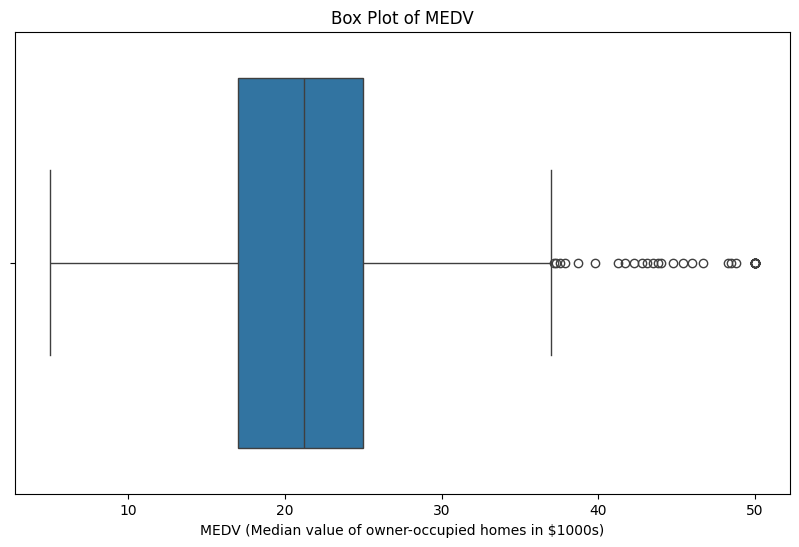

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(x="medv", data=df)
plt.title('Box Plot of MEDV')
plt.xlabel('MEDV (Median value of owner-occupied homes in $1000s)');

<p>As we can see there is some home prices are much more than  average of our data.</p>

<h2>Distrubution of each Feature</h2>

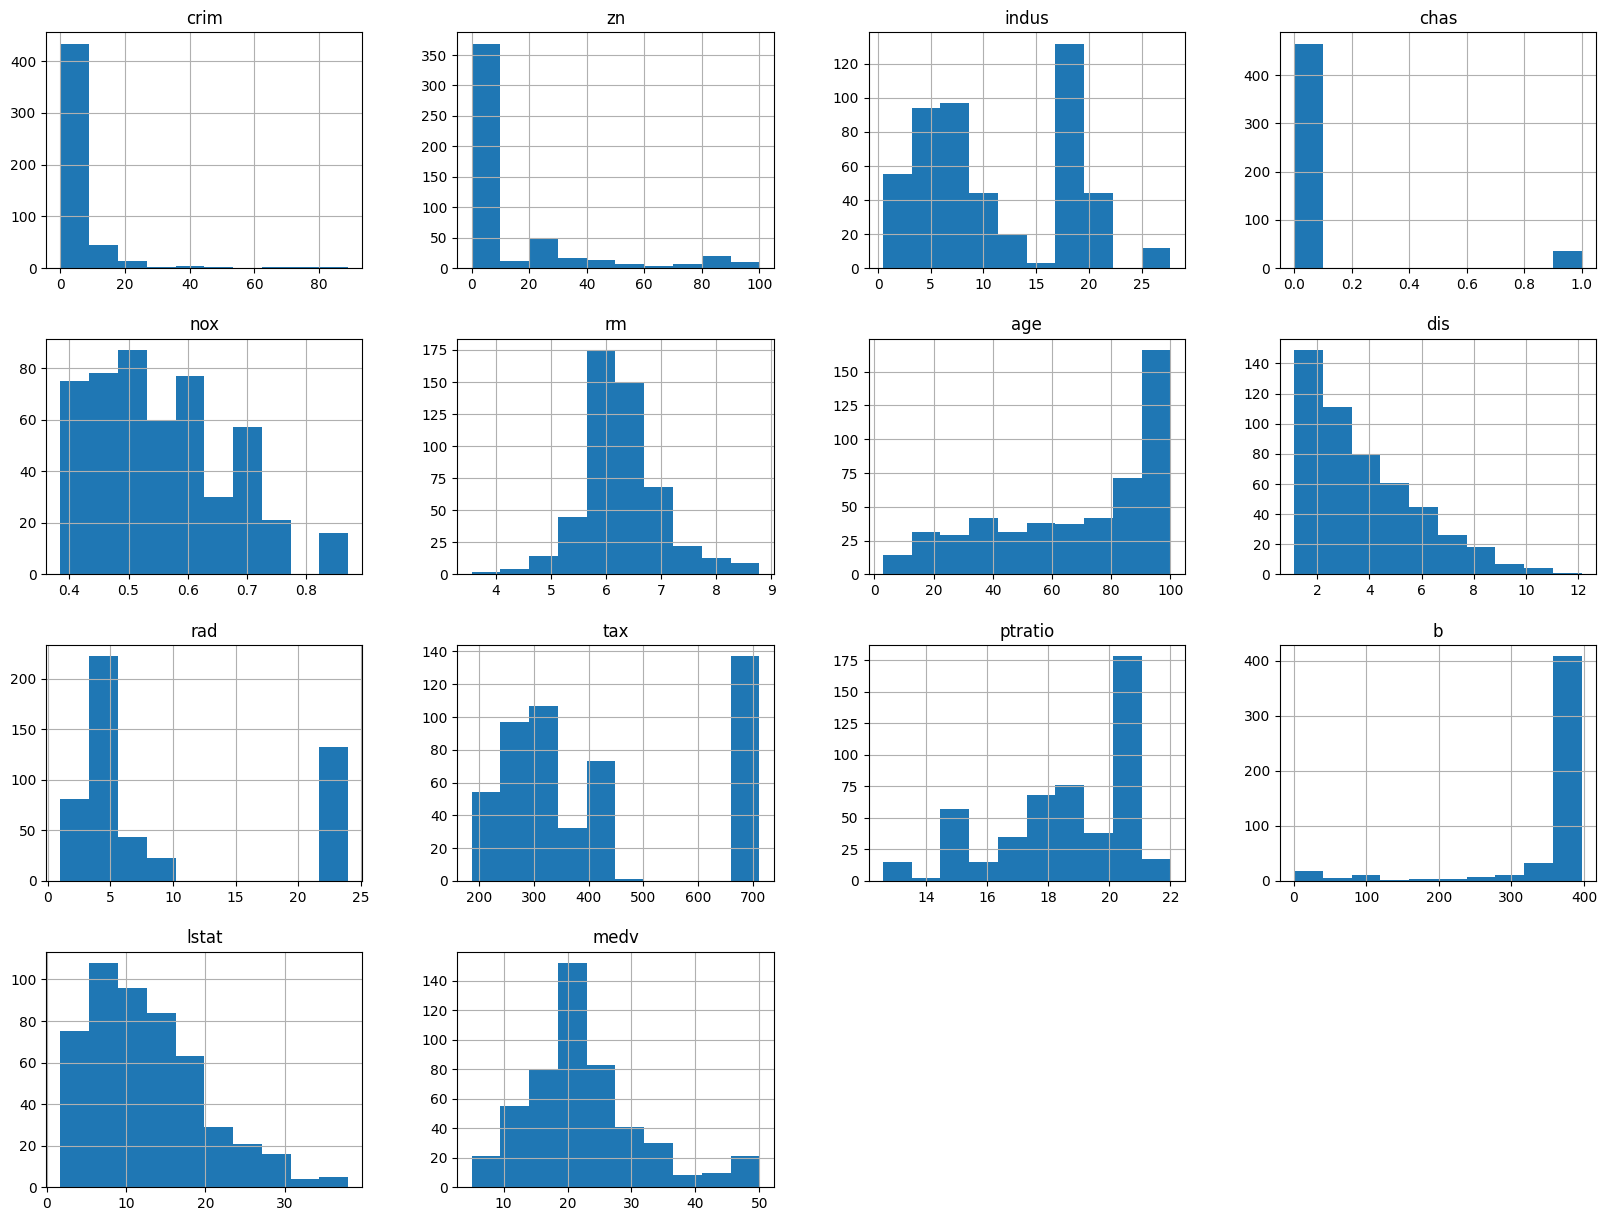

In [44]:
df.hist( figsize=(20,15));

<p>1-In this histogram charts we can say that <b>crim</b> column is crime rate by town. <br>
   2-<b>b </b>The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town. And as we can see there is a bigger scale of black community living in Boston. <br>
    3-<b>chas</b> is Charles river dummy variable which is yes or no <br>    
</p>

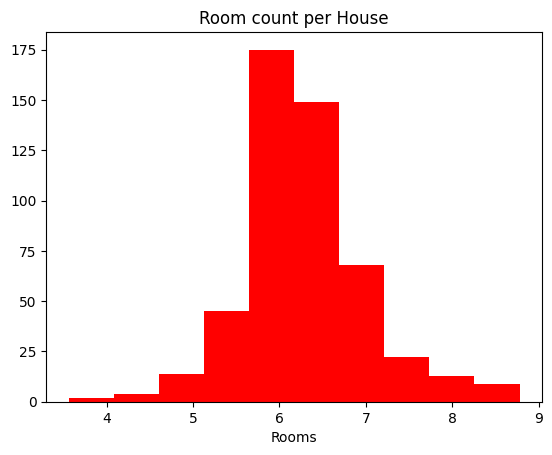

In [51]:
plt.hist(df["rm"], color = "r")
plt.title("Room count per House")
plt.xlabel("Rooms");

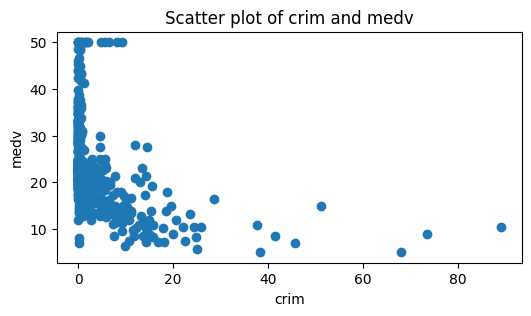

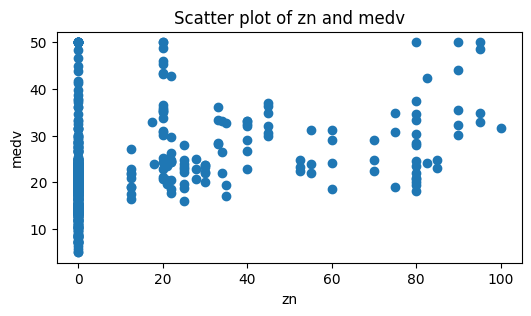

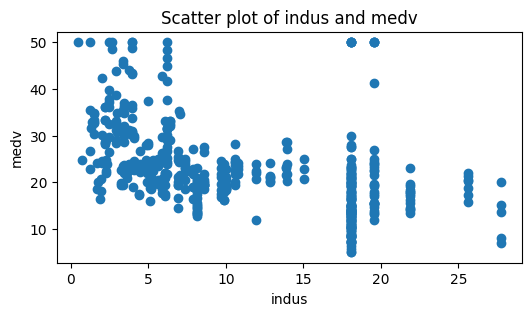

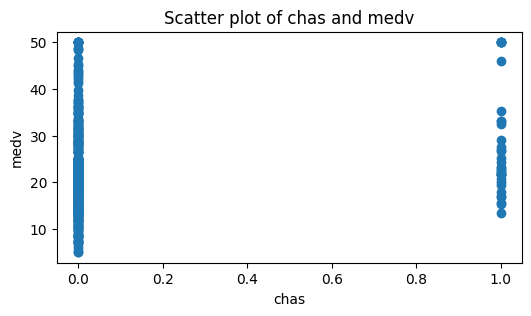

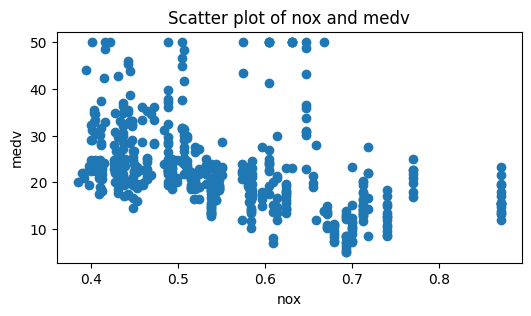

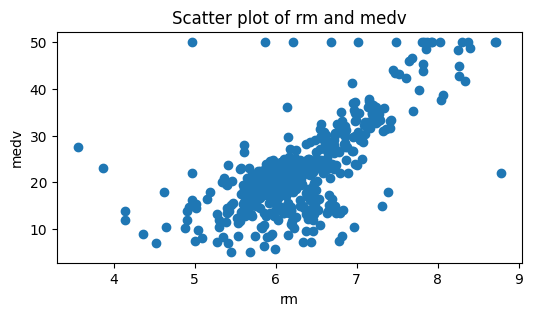

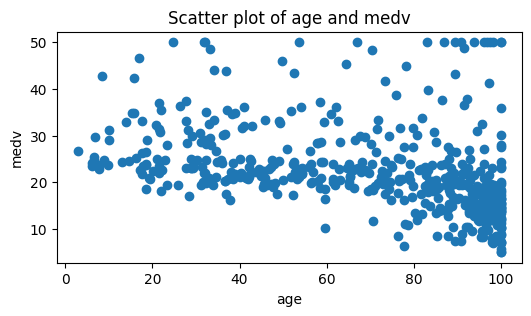

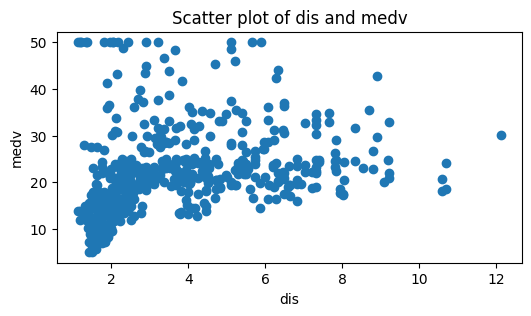

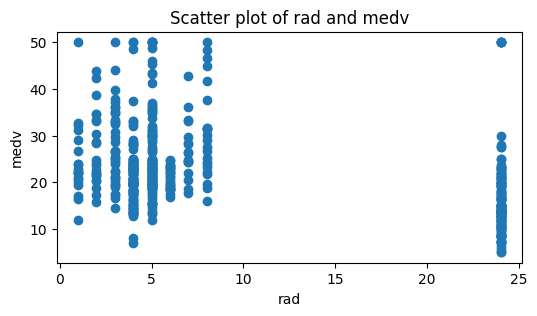

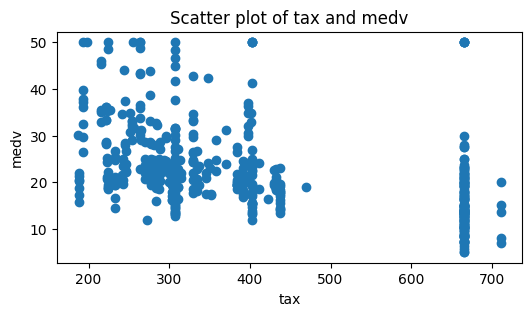

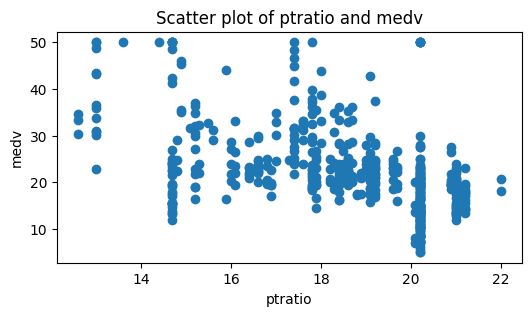

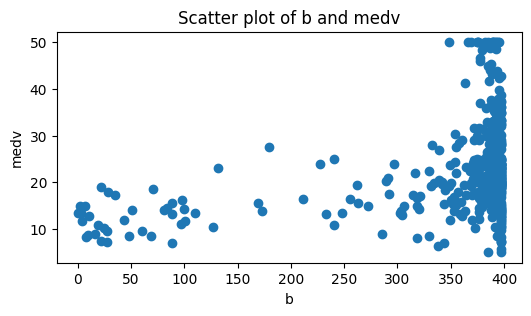

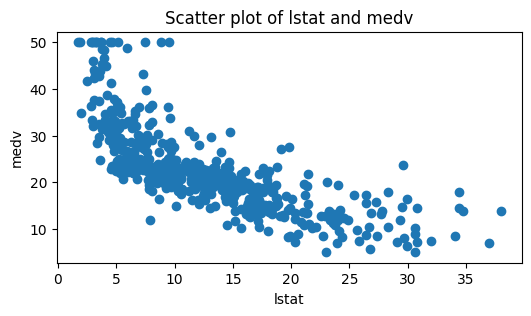

In [59]:
x_names = df.columns[0:13]
y_names= df.columns[-1]

def scatterAll(x,y):
    plt.figure(figsize=(6,3))
    plt.scatter(df[x],df[y])
    plt.ylabel(y)
    plt.xlabel(x)
    plt.title("Scatter plot of "+x+" and "+y)
    plt.show()

for i in x_names:
    scatterAll(i,y_names)

In this Scatter charts we can assume that most of crimes is happens between 30.000 - 10.000 price tag houses. And as usually when house price are higher the rooms number is also increasing.Also we can say that age is effectiing the price of houses. And cheap houses are much likely to close the employment centers. Also we can say that <b>RAD</b> column is categorical column. We can say that teacher houses are between 30 -20 (thound dollars).We can say black people are more than others in Boston. As house price increase density of population is decreasing. 

In [64]:
grouped_age = df["age"].groupby(df['medv']).describe()
grouped_age
#plt.plot(df["medv"], df["age"], color="Orange")

,count,mean,std,min,25%,50%,75%,max
medv,,,,,,,,
5.0,2.0,100.000000,0.000000,100.0,100.000,100.00,100.000,100.0
5.6,1.0,100.000000,NaN,100.0,100.000,100.00,100.000,100.0
6.3,1.0,77.800000,NaN,77.8,77.800,77.80,77.800,77.8
7.0,2.0,99.150000,1.202082,98.3,98.725,99.15,99.575,100.0
7.2,3.0,99.366667,1.096966,98.1,99.050,100.00,100.000,100.0
...,...,...,...,...,...,...,...,...
46.7,1.0,17.000000,NaN,17.0,17.000,17.00,17.000,17.0
48.3,1.0,70.400000,NaN,70.4,70.400,70.40,70.400,70.4
48.5,1.0,33.200000,NaN,33.2,33.200,33.20,33.200,33.2


In [83]:
group_bins =  [0, 18, 30, 40, 50, 60, 100] 
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']
df["age_group"]= pd.cut(df["age"],bins=group_bins,labels=labels)
aged_group_mean = df.groupby("age_group")["medv"].mean()
aged_group_med = df.groupby("age_group")["medv"].median()
aged_group_med

C:\Users\yakup\AppData\Local\Temp\ipykernel_12840\2267756791.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aged_group_mean = df.groupby("age_group")["medv"].mean()
C:\Users\yakup\AppData\Local\Temp\ipykernel_12840\2267756791.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aged_group_med = df.groupby("age_group")["medv"].median()


age_group
0-18     25.20
19-30    24.50
31-40    24.70
41-50    22.50
51-60    22.65
61+      19.00
Name: medv, dtype: float64

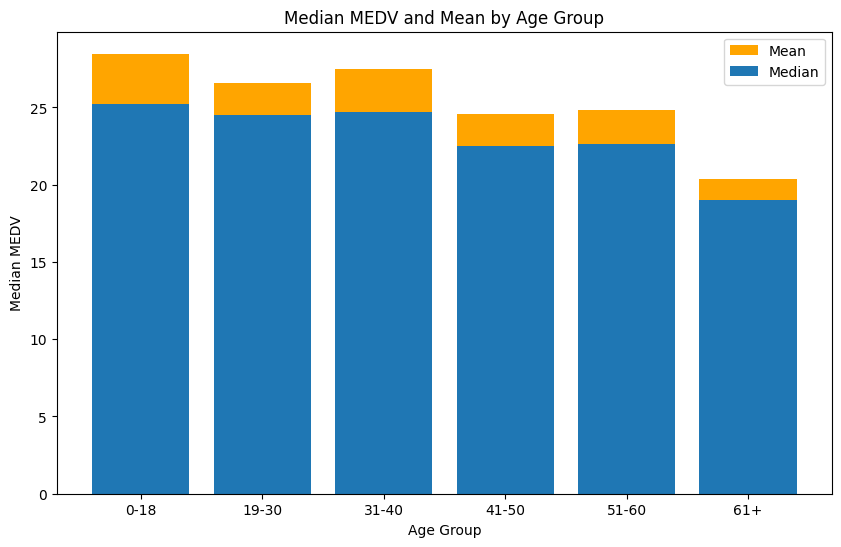

In [94]:
plt.figure(figsize=(10,6))
plt.bar(aged_group_mean.index,aged_group_mean.values, color= "orange")
plt.bar(aged_group_med.index,aged_group_med.values)
plt.title('Median MEDV and Mean by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median MEDV')
plt.legend(labels=("Mean","Median"),loc="upper right")
plt.show();